**Car Price Prediction(Used Cars) Model**

**Uploading the dataset file**

In [ ]:
from google.colab import files
u=files.upload()

In [78]:
#Extracting the zip file
import zipfile
zip=zipfile.ZipFile("/content/archive (4).zip","r")
zip.extractall('/content')
zip.close()

**Importing Necessary Required Libraries**

In [133]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [134]:
data = pd.read_csv('/content/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**Getting Information About the Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [136]:
#Checking Null Values In The Dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [137]:
#Checking any Duplicated Values in the Dataset
data.duplicated().sum()

2

In [138]:
#Dropping the Duplicated Values from the Dataset
data.drop_duplicates(inplace=True)

In [139]:
data.duplicated().sum()

0

In [140]:
#Getting Overall Statistics About The Dataset
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Data Preprocessing**

In [141]:
#Getting Realtime Date and Time to know how many Years the Car has been Used since First Purchased
import datetime
date_time = datetime.datetime.now()
date_time

datetime.datetime(2023, 11, 9, 8, 34, 46, 606882)

In [142]:
data['Used_Year']=date_time.year - data['Year']
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Used_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [143]:
data.drop('Year',axis=1,inplace=True)

In [144]:
data

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Used_Year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


**Removing Outliers**

<Axes: >

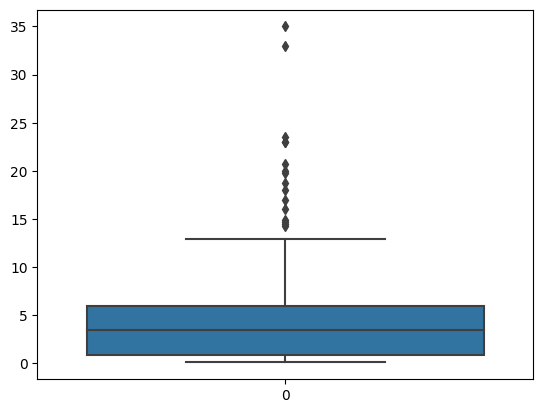

In [145]:
import seaborn as sns
sns.boxplot(data['Selling_Price'])

In [146]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.65,
 3.6,
 3.51

In [147]:
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [148]:
data.shape

(297, 9)

**Encoding the Categorical Columns using Map() Function**

In [149]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [150]:
#Encoding Fuel_Type column values
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [151]:
data['Fuel_Type'].unique()

array([0, 1, 2])

In [152]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [153]:
#Encoding Selling_type column values
data['Selling_type'] = data['Selling_type'].map({'Dealer':0,'Individual':1})

In [154]:
data['Selling_type'].unique()

array([0, 1])

In [155]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [156]:
#Encoding Transmission column values
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})

In [157]:
data['Transmission'].unique()

array([0, 1])

In [158]:
data

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Used_Year
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,1,0,0,0,7
297,brio,4.00,5.90,60000,0,0,0,0,8
298,city,3.35,11.00,87934,0,0,0,0,14
299,city,11.50,12.50,9000,1,0,0,0,6


**Storing Feature Matrix In X and Response(Target) In Vector y**

In [159]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [160]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 297, dtype: float64

**Splitting The Dataset Into The Training Set And Test Set**

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

**Importing The models**

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

**Model Training**

In [163]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Prediction on Test Data**

In [164]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

**Evaluating the Algorithm**

In [165]:
from sklearn import metrics

score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.6581213012486848 0.9625930979625447 0.9513949697087726 0.949514993007978


In [166]:
final_data = pd.DataFrame({'Models': ['LR', 'RF', 'GBR', 'XG'],
                            "R2_SCORE": [score1, score2, score3, score4]})

final_data = final_data.sort_values(by='R2_SCORE', ascending=False)
final_data

,Models,R2_SCORE
1,RF,0.962593
2,GBR,0.951395
3,XG,0.949515
0,LR,0.658121


<Axes: xlabel='Models', ylabel='R2_SCORE'>

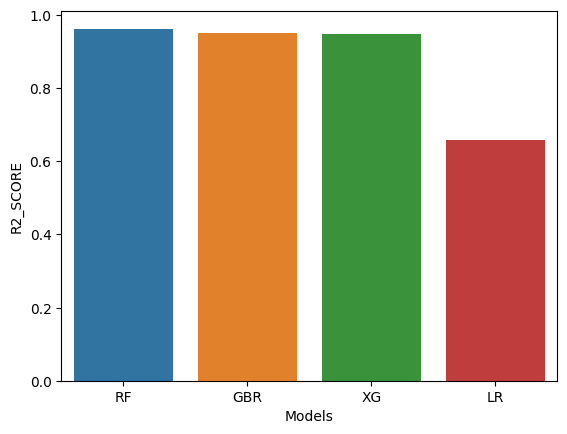

In [167]:
sns.barplot(x=final_data['Models'], y=final_data['R2_SCORE'])

In [168]:
rf = RandomForestRegressor()
rf_final=rf.fit(X,y)

**Car Price Predictive System**

In [169]:
import pandas as pd

# Taking input from the user
present_price = float(input("Enter Present Price: "))
driven_kms = int(input("Enter Driven Kms: "))
fuel_type = int(input("Enter Fuel Type (0 for Gasoline, 1 for Diesel, 2 for CNG): "))
selling_type = int(input("Enter Selling Type (0 for Individual, 1 for Dealer): "))
transmission = int(input("Enter Transmission Type (0 for Manual, 1 for Automatic): "))
owner = int(input("Enter Number of Owners: "))
used_year = int(input("Enter Used Years: "))

# Creating a DataFrame with user input
data_new = pd.DataFrame({
    'Present_Price': [present_price],
    'Driven_kms': [driven_kms],
    'Fuel_Type': [fuel_type],
    'Selling_type': [selling_type],
    'Transmission': [transmission],
    'Owner': [owner],
    'Used_Year': [used_year]
})

predictions = rf_final.predict(data_new)
predicted_price_in_rupees = predictions[0] * 10000

print("The Predicted Price for the Used Car is: ₹ {:.2f}".format(predicted_price_in_rupees))



Enter Present Price: 400000
Enter Driven Kms: 4000
Enter Fuel Type (0 for Gasoline, 1 for Diesel, 2 for CNG): 0
Enter Selling Type (0 for Individual, 1 for Dealer): 1
Enter Transmission Type (0 for Manual, 1 for Automatic): 0
Enter Number of Owners: 1
Enter Used Years: 10
The Predicted Price for the Used Car is: ₹ 188096.00
